In [1]:
include("../src/FOAM.jl")
using PyPlot

In [2]:
orgCase = ENV["FOAM_TUTORIALS"] * "/incompressible/pimpleFoam/RAS/TJunction"
case = "Tjunction.pimpleFoam"
if !isdir("test")
    mkdir("test")
end
n = 0
while true
    name = joinpath("test",join([case,n],"_"))
    if !isdir(name)
        case = name
        break
    end
    n += 1
end
run(`cp -r $orgCase $case`)
runCase(case)

Running blockMesh on /home/inabower/OpenFOAM/inabower-v1806/run/FOAM.jl/example/test/Tjunction.pimpleFoam_0
Running pimpleFoam on /home/inabower/OpenFOAM/inabower-v1806/run/FOAM.jl/example/test/Tjunction.pimpleFoam_0


In [3]:
times = timeList(case)
meshProp = meshProperties(case)
checkMesh(meshProp)

For region master
  nPoints = 5616
  nFaces = 13200
  nCells = 3875
 Face Area
  Min = 1.5999999999999806e-5
  Max = 1.600000000000003e-5
 Volume
  Min = 6.39999999999988e-8
  Max = 6.400000000000041e-8
  Total = 0.0002480000000000001
 Bounding Box
  Min = [0.0, -0.21, 0.0]
  Max = [0.22, 0.21, 0.02]
 Fields : 
  U epsilon k nut p phi s 
 For Boundary outlet1
    surface area : 0.0003999999999999997 (vec) : [0.0, -0.0004, 0.0]
 For Boundary inlet
    surface area : 0.00040000000000000013 (vec) : [-0.0004, 0.0, 0.0]
 For Boundary outlet2
    surface area : 0.00039999999999999975 (vec) : [0.0, 0.0004, 0.0]
 For Boundary defaultFaces
    surface area : 0.04920000000000133 (vec) : [0.0004, 1.49078e-18, 4.46895e-18]


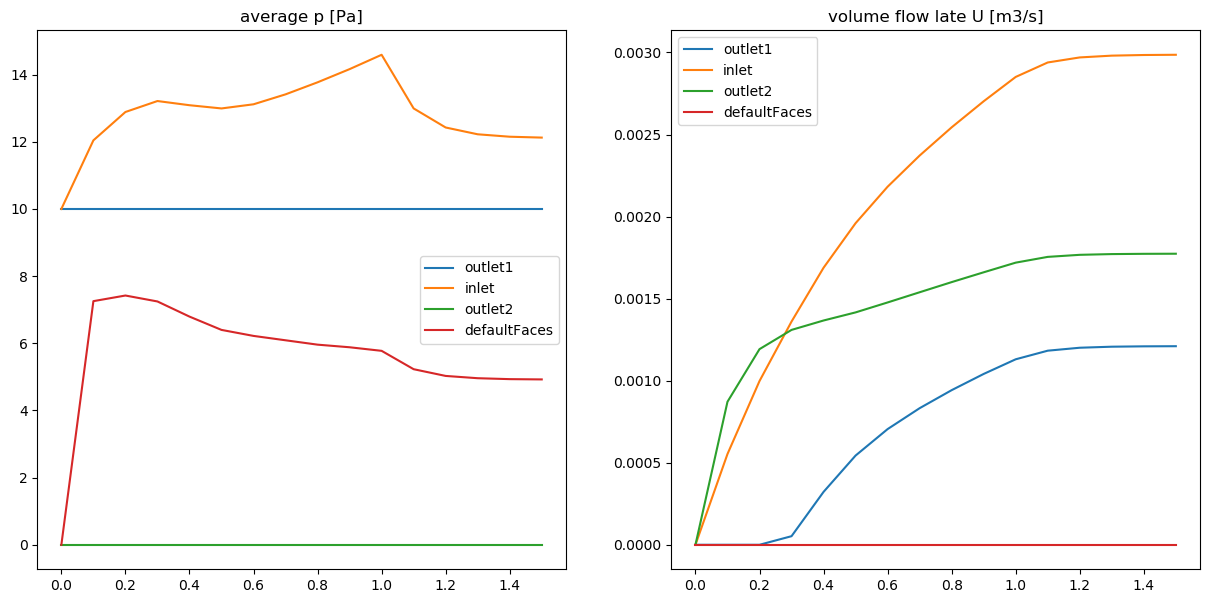

In [4]:
fig = figure("result",figsize=(15,7));n = 1;pos = 120
x = Float64[]
for t in keys(times)
    push!(x,t)
end
for region in keys(meshProp["regions"])
    p = Dict()
    U = Dict()
    for t in keys(times)
        p[t] = field(case, "p", times[t], "master")
        U[t] = field(case, "U", times[t], "master")
    end
    for b in keys(meshProp[region]["boundary"])
        yp = Float64[]
        yu = Float64[]
        for t in keys(times)
            pp = boundaryField(p[t], meshProp[region], false)
            pU = boundaryField(U[t], meshProp[region], true)
            A = meshProp[region]["boundary"][b]["surfaceArea"]
            ppb = pp[b]
            pUb = pU[b]
            avep = 0.0
            sumU = 0.0
            for bi in 1:length(A)
                avep += ppb[bi] / length(A)
                sumU += norm(dot(pUb[bi], A[bi]))
            end
            push!(yp,avep)
            push!(yu,sumU)
        end
        subplot(pos+1);title("average p [Pa]")
        plot(x,yp,label=b)
        legend()
        subplot(pos+2);title("volume flow late U [m3/s]")
        plot(x,yu,label=b)
        legend()
    end
end        